<a href="https://colab.research.google.com/github/DMEvanCT/CoverageML/blob/main/neuralnetworkcarinsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('car_insurance.csv')

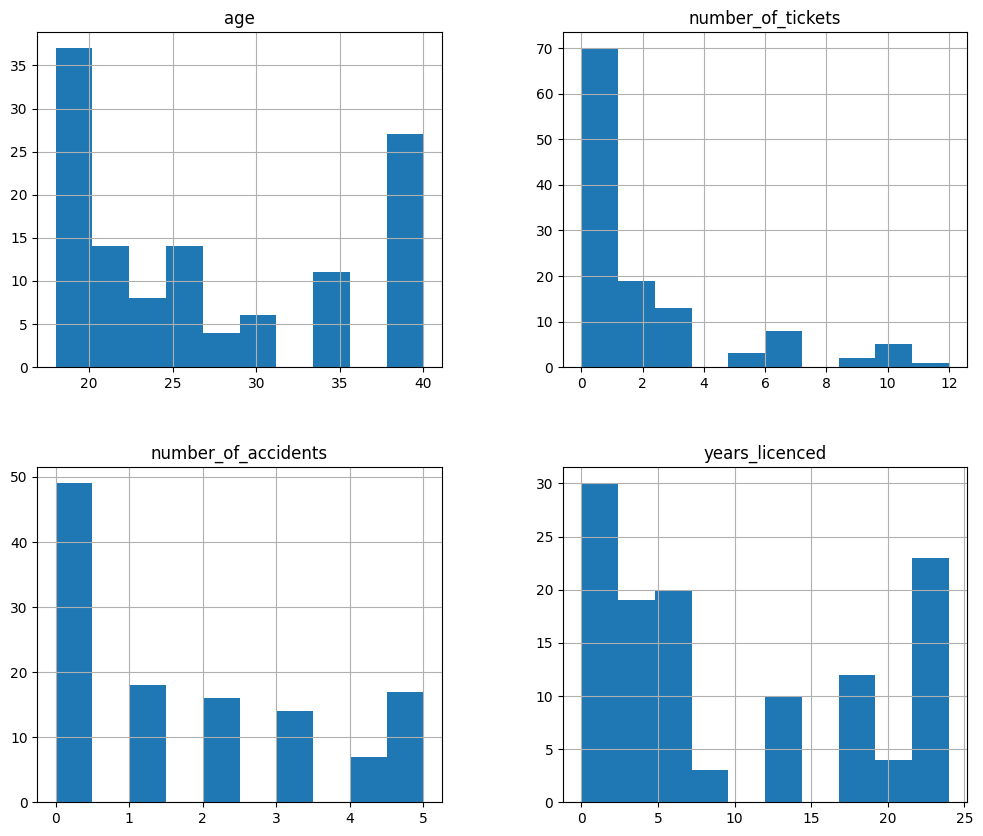

In [ ]:
_ = df.hist(figsize=(12, 10))

In [ ]:
import seaborn as sns

In [ ]:
df = df = df.astype(int)

<Axes: >

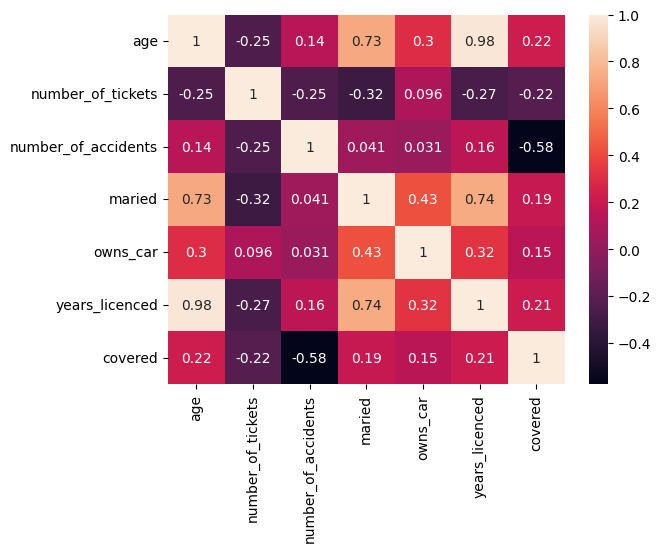

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from keras.utils import to_categorical

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(df.drop("covered", axis=1))
y = df["covered"].values
y_cat = to_categorical(y)


In [ ]:
X.shape

(121, 6)

In [ ]:
y


array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_cat.shape

(121, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=22,
                                                    test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(6,), activation='relu'))
model.add(Dense(30, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(Adam(lr=0.05), loss='categorical_crossentropy', metrics="accuracy")

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.1)

Epoch 1/100
3/3 - 3s - loss: 0.6060 - accuracy: 0.6744 - val_loss: 0.5555 - val_accuracy: 0.7000 - 3s/epoch - 929ms/step
Epoch 2/100
3/3 - 0s - loss: 0.5910 - accuracy: 0.7093 - val_loss: 0.5424 - val_accuracy: 0.7000 - 72ms/epoch - 24ms/step
Epoch 3/100
3/3 - 0s - loss: 0.5769 - accuracy: 0.6977 - val_loss: 0.5298 - val_accuracy: 0.7000 - 79ms/epoch - 26ms/step
Epoch 4/100
3/3 - 0s - loss: 0.5636 - accuracy: 0.6977 - val_loss: 0.5195 - val_accuracy: 0.7000 - 123ms/epoch - 41ms/step
Epoch 5/100
3/3 - 0s - loss: 0.5513 - accuracy: 0.7093 - val_loss: 0.5097 - val_accuracy: 0.7000 - 92ms/epoch - 31ms/step
Epoch 6/100
3/3 - 0s - loss: 0.5412 - accuracy: 0.7209 - val_loss: 0.5010 - val_accuracy: 0.7000 - 83ms/epoch - 28ms/step
Epoch 7/100
3/3 - 0s - loss: 0.5290 - accuracy: 0.7209 - val_loss: 0.4929 - val_accuracy: 0.7000 - 40ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 0.5181 - accuracy: 0.7209 - val_loss: 0.4852 - val_accuracy: 0.7000 - 35ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s - l

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1202 (4.70 KB)
Trainable params: 1202 (4.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 148ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test_class, y_pred_class)

0.84

In [ ]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.91      0.77      0.83        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



In [ ]:
confusion_matrix(y_test_class, y_pred_class)

array([[11,  1],
       [ 3, 10]])

In [ ]:
model.save('insurance/coverage_insurance.keras') 